In [13]:
#7/6/24 For the implementation of K-fold testing with Random Forests onto the mutagen fingerprint data

import os
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
seed = 80
#Data import
datasets = []
index = []
#directory = '/Users/james/Documents/Honours/Data/structdata/endocrine_redux/Chemopy/SR-ATAD5/'
directory = '/Users/james/Documents/Honours/Data/structdata/Mutagen/chemopy/'
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        df.drop(columns=['SMILES'], inplace=True)
        
        #drops 90% of negative columns to resolve class imbalance
        #ytrain = df.iloc[:, 0].values
        #reps = 0
        #todrop = []
        #for item in ytrain:
        #    if reps % 10 != 0 and item == 0:
        #        todrop.append(reps)
        #    reps = reps + 1

        #df = df.drop(todrop)
        #df = df.dropna(axis=1)
        datasets.append(df)
        index.append(file)

targetdata = datasets[0]
for item in datasets[1:]:
    targetdata = pd.concat([targetdata, item.iloc[:,2:]], axis=1)

targetdata = targetdata.dropna()

#Splitting data into 5 folds 
dfarray = targetdata.to_numpy()
#First set aside 20% of the data for a final validation at the end
dfarray, tempset = train_test_split(dfarray, test_size=0.2, random_state=seed)

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

In [14]:
zercount = 0
onecount = 0
for item in targetdata['Toxicity_Values']:
    if item == 0:
        zercount = zercount + 1
    else:
        onecount = onecount + 1

print(zercount, onecount)

3146 3796


In [15]:
#function to calculate various metrics, outputs a list of various metrics with a consistent index
def metriccalc(preds, ytrain):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0
    
    #loop through each item in the predictions, logging positives, negatives and tn/tp/fn/tp
    iterations = 0
    for value in preds:
        testscore = ytrain[iterations]
        if value == 1:
            if testscore != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if testscore != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        iterations = iterations + 1
    
    #calculate a wide swathe of metrics
    netfn = fncount / (fncount + tncount)
    nettn = tncount / (fncount + tncount)
    netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    posacc = tpcount / testpos
    negacc = tncount / testneg
    netfp = fpcount / (fpcount + tpcount)
    nettp = tpcount / (tpcount + fpcount)

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)



    f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)


    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount

    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return 0
    mcc = ((tp * tn) - (fp * fn)) / temp



    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
    if temp == 0:
        return 0
    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp
    
    metriclist = [testpos, testneg, fn, tn, tp, fp, netacc, posacc, negacc, fpr, tpr, f1, mcc, kapp]
    
    return metriclist

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 1 best mcc of 0.628188369510922 with an mtry of 41


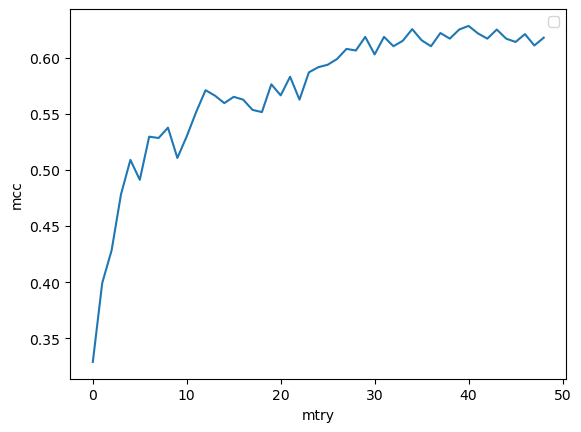

for model 1 validation metrics of:
positives in data 309
negatives in data 247 

fn count = 47
tn count = 195
tp count = 262
fp count = 52 

net accuracy = 0.8219424460431655
positive accuracy = 0.8478964401294499
negative accuracy = 0.7894736842105263 

fpr = 0.21052631578947367
tpr = 0.8478964401294499 

f1 score = 0.841091492776886
mcc = 0.638773531321983
cohen Kappa = 0.6386671568112593


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 2 best mcc of 0.6070969747727292 with an mtry of 37


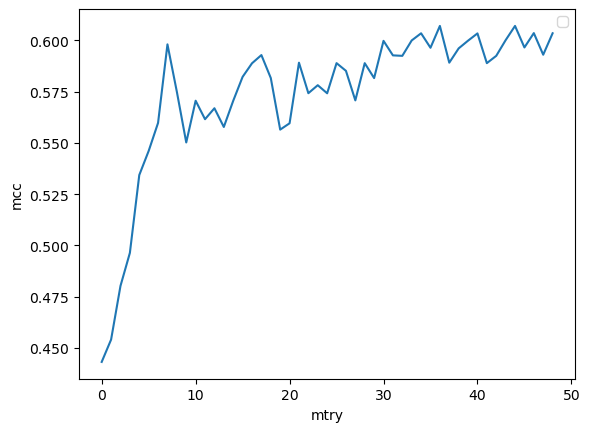

for model 2 validation metrics of:
positives in data 308
negatives in data 248 

fn count = 44
tn count = 197
tp count = 264
fp count = 51 

net accuracy = 0.829136690647482
positive accuracy = 0.8571428571428571
negative accuracy = 0.7943548387096774 

fpr = 0.2056451612903226
tpr = 0.8571428571428571 

f1 score = 0.8475120385232745
mcc = 0.6535070612525689
cohen Kappa = 0.6532937747787959


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 3 best mcc of 0.6606189043091636 with an mtry of 47


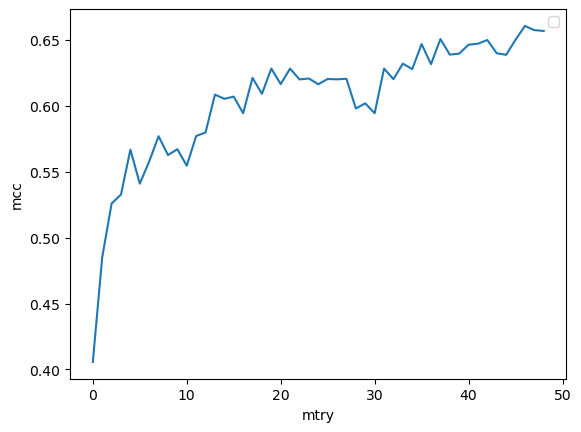

for model 3 validation metrics of:
positives in data 304
negatives in data 252 

fn count = 48
tn count = 202
tp count = 256
fp count = 50 

net accuracy = 0.8237410071942446
positive accuracy = 0.8421052631578947
negative accuracy = 0.8015873015873016 

fpr = 0.1984126984126984
tpr = 0.8421052631578947 

f1 score = 0.839344262295082
mcc = 0.6441467757141557
cohen Kappa = 0.6441297873452113


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 4 best mcc of 0.6093665187095525 with an mtry of 30


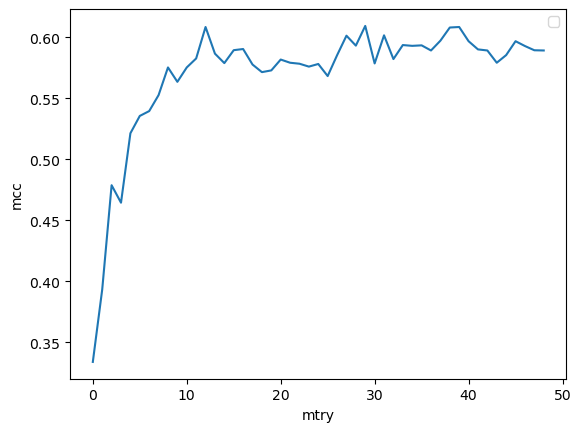

for model 4 validation metrics of:
positives in data 298
negatives in data 258 

fn count = 48
tn count = 205
tp count = 250
fp count = 53 

net accuracy = 0.8183453237410072
positive accuracy = 0.8389261744966443
negative accuracy = 0.7945736434108527 

fpr = 0.2054263565891473
tpr = 0.8389261744966443 

f1 score = 0.831946755407654
mcc = 0.6344288218252657
cohen Kappa = 0.634324859345697


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 5 best mcc of 0.6423124582342113 with an mtry of 45


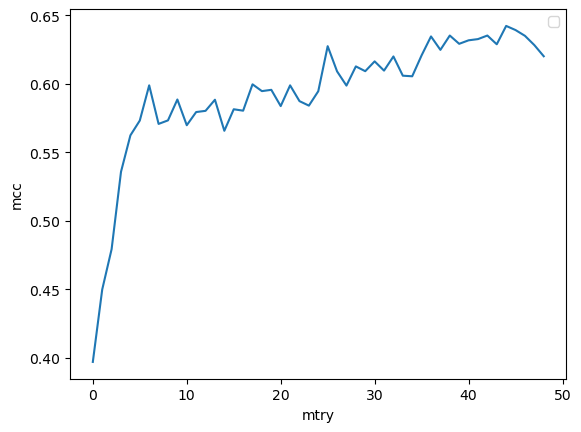

for model 5 validation metrics of:
positives in data 294
negatives in data 260 

fn count = 55
tn count = 215
tp count = 239
fp count = 45 

net accuracy = 0.8194945848375451
positive accuracy = 0.8129251700680272
negative accuracy = 0.8269230769230769 

fpr = 0.17307692307692307
tpr = 0.8129251700680272 

f1 score = 0.8269896193771626
mcc = 0.6388461347911534
cohen Kappa = 0.6384284036026628


In [16]:
model_list = []
validlist = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)
    
    ytrain = trainset[0].values
    xtrain = trainset.iloc[:, 1:]
    
    ytest = testset[0].values
    xtest = testset.iloc[:, 1:]
    
    yvalid = validset[0].values
    xvalid = validset.iloc[:, 1:]
    
    #lists of metric values
    mcclist = []
    maxval = 0
    for mtry in range(1, 50):
        #using mtry as the adjusted hyperparameter creates a series of random forests
        rf = RandomForestClassifier(n_estimators=mtry, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

        model= rf.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        #calculate metric (mcc)
        mcc = metriccalc(preds, ytest)[12]
        mcclist.append(mcc)
        if mcc > maxval:
            maxval = mcc
            bestmetrics = mtry
    #store best model for the given fold and plot the metric vs mcc value
    rf = RandomForestClassifier(n_estimators=bestmetrics, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    model_list.append(rf)
    print('for fold', split + 1, 'best mcc of', maxval, 'with an mtry of', bestmetrics)
    plt.plot(mcclist)

    plt.xlabel('mtry')
    plt.ylabel('mcc')
    plt.legend()
    plt.show()
    
    #check models onto validation set, printing various metrics
    model= rf.fit(xtrain, ytrain)
    preds = model.predict(xvalid)
    results = metriccalc(preds, yvalid)
    validlist.append(results)
    print('for model', iteration, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    iteration = iteration + 1

In [17]:
y = tempset[:, 0]
x = tempset[:, 1:]
iter = 1
for model in model_list:
    predictions = []
    preds = model.predict(x)
    predictions.append(preds)
    
    results = metriccalc(preds, y)
    print('model', iter, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13], '\n')
    iter = iter + 1

model 1 validation metrics of:
positives in data 761
negatives in data 628 

fn count = 120
tn count = 490
tp count = 641
fp count = 138 

net accuracy = 0.8142548596112311
positive accuracy = 0.8423127463863338
negative accuracy = 0.7802547770700637 

fpr = 0.2197452229299363
tpr = 0.8423127463863338 

f1 score = 0.8324675324675325
mcc = 0.624345470954617
cohen Kappa = 0.6241307626633327 

model 2 validation metrics of:
positives in data 761
negatives in data 628 

fn count = 123
tn count = 486
tp count = 638
fp count = 142 

net accuracy = 0.8092152627789777
positive accuracy = 0.8383705650459922
negative accuracy = 0.7738853503184714 

fpr = 0.22611464968152867
tpr = 0.8383705650459922 

f1 score = 0.8280337443218689
mcc = 0.6141142746746827
cohen Kappa = 0.6138788971654976 

model 3 validation metrics of:
positives in data 761
negatives in data 628 

fn count = 114
tn count = 499
tp count = 647
fp count = 129 

net accuracy = 0.8250539956803455
positive accuracy = 0.850197109067017

In [18]:
#get x and y values for the final validation set


toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[0])
    fingerprints.append(row[1:])


In [19]:
#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []
for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    #appends each model's prediction to a list
    predictions = []
    predlist = []
    for model in model_list:
        preds = model.predict(fp)
        predictions.append(preds)
        predlist.append(preds)
    predictions.append(predlist)
    
    #finds number of 0s in the prediction list
    zercount = 0
    for num in predictions:
        if num == 0:
            zercount = zercount + 1
    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 761
negatives in data 628 

fn count = 109
tn count = 504
tp count = 652
fp count = 124 

net accuracy = 0.8322534197264219
positive accuracy = 0.8567674113009198
negative accuracy = 0.802547770700637 

fpr = 0.19745222929936307
tpr = 0.8567674113009198 

f1 score = 0.8484059856864021
mcc = 0.6608518782779794
cohen Kappa = 0.6606941973389137
